# Funktionen (mathematische)

## Inhalt
* [Funktion](#Funktion)
* [Piecewise](#Piecewise)
* [Grenzwerte](#Grenzwerte)
* [Stetigkeit](#Stetigkeit)


### Funktion
(reelle) <strong>Funktion</strong> mehrerer Veränderlicher: Abbildung $$f: \ D \subset \mathbb{R}^n \ \rightarrow \ \mathbb{R}.$$ die jedem Element aus $D$ eindeutig genau ein Element aus $\mathbb{R}$ zuordnet.  

* Definitionsbereich: $D \subset \mathbb{R}$, $D \neq \emptyset$.
* Wertebereich: Die Menge $f(D)$ aller rellen Zahlen, die als Werte der Funktion vorkommen.             

``` python
f(x,y,...) = <expr(x,y,..)>
```

Abbildung $f$ mit Argumenten $x,y,..$. 

In [1]:
f(x,y) = x^2+y^2; f

(x, y) |--> x^2 + y^2

type und <em>parent</em> (der mathematische Typ, bzw. die Klassifizierung). Hier: <em>SR</em> symbolic ring  

In [1]:
type(f), parent(f)

(<type 'sage.symbolic.expression.Expression'>,
 Callable function ring with arguments (x, y))

Die so definierte Funktion $f$ kann wie jede beliebige andere Funktion aufgerufen werden. Funktionen haben den Datentyp <em>expression</em>.<br /><br />  

In [1]:
var('a,b')
f(a,b+1)

a^2 + (b + 1)^2

Seien $f$ und $g$ Funktionen mit einem gemeinsamen Definitionsbereich.
Dann können Abbildungen addiert, subtrahiert, multipliziert und dividiert werden

In [1]:
f(x) = 1/(1+x)
g(x) = sin(x^2)
h = f+g
k = f*g; l = f/g
(h(a),k(a),l(a))

(1/(a + 1) + sin(a^2), sin(a^2)/(a + 1), 1/((a + 1)*sin(a^2)))

Komposition: Mit $f:D_f \rightarrow \mathbb{R}$ und $g:D_g \rightarrow \mathbb{R}$      
mit $f(D_f) \subset D_g$                                                                      
$$(g \circ f) (x):=g(f(x)).$$

In [1]:
f_g(x) = f(g)
g_f(x) = g(f)
(f_g(x), g_f(x))

(1/(sin(x^2) + 1), sin((x + 1)^(-2)))

Mehrfaches Hintereinanderschalten $$f(f(\cdots f(\cdot)))=f \circ \dots$$

In [1]:
g4(x) = g(g(g(g)));g4

x |--> sin(sin(sin(sin(x^2)^2)^2)^2)

Kompliziertere mathematische Funktionen k&ouml;nnen besser durch selbst definierte Funktionen/Prozeduren 
``` python
def <func>
```
erklärt werden (vgl. Einheit 13)

####  Funktion oder Ausdruck?

Funktion $f$ als Funktion $f(x)=expr(x)$ oder als Ausdruck $f=expr$ (Vorsicht: der Typ ist identisch). Funktionsauswertung ist i.A. allerdings unterschiedlich.  

In [1]:
Funktion(x) = 2*x*cos(x)
Funktion(1)

2*cos(1)

In [1]:
Ausdruck = 2*x*cos(x)
Ausdruck(x=1)

2*cos(1)

In [1]:
Funktion, Ausdruck

(x |--> 2*x*cos(x), 2*x*cos(x))

### Stückweise Funktionen

Stückweise definierte Funktionen und Funktionen mit eingeschr&auml;nkten Definitionsbereich.  

``` python
piecewise([[<interval>,<function>], [<interval2>,<function2>],...])
```

* *interval*: Tuple von der unterem und oberen Intervallgrenze. Man kann entweder geschlossene oder offene Intervalle angeben:

    * [a,b] geschlossenes Intervall
    * (a,b) offenes Intervall

Zwei aneinanderh&auml;ngende Intervalle können sich dann evtl. Endpunkte teilen!

In [1]:
g = piecewise([[(-pi,0),-x^2+x^5],[(0,2),x^9]]); g

piecewise(x|-->x^5 - x^2 on (-pi, 0), x|-->x^9 on (0, 2); x)

Definitionsbereich  

In [1]:
g.domain()

(-pi, 0) + (0, 2)

Supremum

In [1]:
g.domain().sup()

2

Infimum

In [1]:
g.domain().inf()

-pi

piecewise funktion können ganz normal auch direkt geplottet werden  

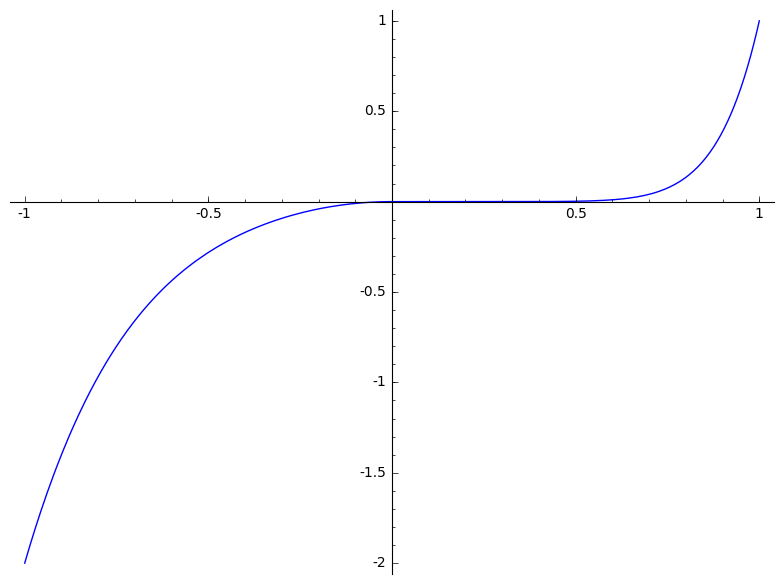

In [1]:
plot(g)

Endpunkte  

In [1]:
g.end_points()

[-pi, 0, 2]

genutzte Funktionen in Piecewise

In [1]:
g.pieces()

(piecewise(x|-->x^5 - x^2 on (-pi, 0); x), piecewise(x|-->x^9 on (0, 2); x))

mit der ```items()``` Objektmethode kann man über den Support und den dazugehörigen Funktionen iterieren

In [1]:
[func for support, func in g.items()]
    

[x^5 - x^2, x^9]

### Grenzwerte 
                                                                                              
*Grenzwert*: Sei $f$ eine Funktion mit Definitionsbereich $D$ und $a\in D$.
$f$ strebt für $x \rightarrow a$ gegen $b \in \mathbb{R}$, wenn es zu jedem $\varepsilon >0$ e
in $\delta >0$ gibt, so                                                                       
dass für alle $x \in D\smallsetminus\{a \}$ mit $|x-a|<\delta$ gilt                           
$$ |f(x)-b| < \varepsilon .$$                                   
Der Grenzwert $b$ ist eindeutig bestimmt und man schreibt  
$$ \lim_{x \rightarrow a} f(x) =b \mbox{ oder } f(x) \rightarrow b                            
\mbox{ für } x \rightarrow a. $$  
Die Aussage überträgt sich sinngemäß auf $a=\pm \infty$.                                      



``` python
<expr>.limit(x = <a>, dir=<direction>, taylor=<True>)
limit(<expr>, x = <a>, dir=<direction>, taylor=<True>)
```

Hierdurch wird der (beidseitige) Grenzwert eines Ausdrucks mit Unbekannten $x$ an der Stelle $a$ bestimmt. 
<ul>
<li>```dir='-'```: linksseitiger Limes.</li>
<li>```dir='+'```: rechtsseitiger Limes.</li>
<li>```taylor=True```: es wird eine Taylorentwicklung benutzt.</li>
</ul>
  
*Beispiel:* Grenzwert $\lim_{x \rightarrow 0}\frac{\sin(x)}{x}$  

In [1]:
limit(sin(x)/x,x=0)

1

Grenzwert $\lim_{x \rightarrow \infty}\frac{\log(x)}{x}$  

In [1]:
limit(log(x)/x,x=infinity)

0

Grenzwert $\lim_{x \rightarrow \infty} \sqrt[x]{x}$  

In [1]:
limit(x^(1/x),x=infinity)

1

Grenzwert $\lim_{x \rightarrow \infty} \sqrt[x]{x}$ (Der Grenzwert unbestimmt aber beschr&auml;nkt: <strong>ind</strong> )  

In [1]:
limit(sin(1/x),x=0)

ind

<span id="cell_outer_12"><span id="cell_outer_53"><span id="cell_outer_12">Grenzwert $\lim_{x \rightarrow 0} |x|' $ (<span id="cell_outer_12">Grenzwert unbestimmt:<strong> und</strong></span>)</span></span><br /></span>  

In [1]:
print (limit(diff(abs(x),x),x=0))
print (limit(diff(abs(x),x),x=0,dir='minus'))
print (limit(diff(abs(x),x),x=0,dir='plus'))

und
-1
1


### Stetigkeit
Eine Funktion $f:D \rightarrow \mathbb{R}$ hei&szlig;t stetig an der Stelle $x_0 \in D$, wenn es zu jedem $\varepsilon >0$ ein $\delta > 0$ gibt, so dass f&uuml;r alle $x \in D$ mit $|x - x_0| < \delta$ gilt 
$$|f(x)-f(x_0) | < \varepsilon$$
Man sagt, dass $f$ *stetig*, wenn $f$ an jeder Stelle $x_0 \in D$ stetig ist. 
Sind $f$ und $g$ an $x_0$ stetig, so auch $f+g$, $f-g$, $f \cdot g$ und $\frac{f}{g}$ (falls $g(x_0) \neq 0$).  


Eine Funktion $f: D \rightarrow \mathbb{R}$ ist <em>linksstetig</em> bzw. <em>rechtsstetig</em>, wenn $f|_{D\cap (-\infty,x_0)}$ bzw $f|_{D\cap (x_0,\infty)}$ an $x_0$ stetig ist. Eine Funktion $f$ ist dann an $x_0$ stetig, genau dann wenn $f$ links- und rechtsstetig an $x_0$ ist.

In [1]:
g = piecewise([[[-pi,0],-x^2+x^5],[(0,2),x^9]]); g

piecewise(x|-->x^5 - x^2 on [-pi, 0], x|-->x^9 on (0, 2); x)

Wir gehen hier einen etwas naiven Weg um uns die Stetigkeit anzusehen (Übungsaufgabe):

In [1]:
[(function.limit(x=support.inf()),function.limit(x=support.sup()))  for support, function in g.items()]

[(-pi^5 - pi^2, 0), (0, 512)]

Wir schauen noch "manuell" nach: $\Rightarrow$ g ist in 0 stetig.  

Alternative:

*Hinweis:* Es gibt eigentlich eine direkte limit-Funktion fuer piecewise funktionen, die jedoch leider fehlschlägt:

In [1]:
g.limit(x=0)

TypeError: __call__() takes exactly 2 arguments (3 given)